# Notebook to:
- Visualize graphs
- See the Q table

In [8]:
# library imports
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
# local imports
from environment import TreasureCube
from agents.RandomAgent import RandomAgent
from agents.QLearningAgent import QLearningAgent

In [17]:
def showPlot(X, Y, xlabel, ylabel):
    plt.plot(X, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [14]:
def test_cube(max_episode, max_step):
    env = TreasureCube(max_step=max_step)
    agent = QLearningAgent()
    episode_rewards = []
    for epsisode_num in tqdm(range(0, max_episode)):
        state = env.reset()
        terminate = False
        t = 0
        episode_reward = 0
        while not terminate:
            action = agent.take_action(state)
            # print(action)
            reward, terminate, next_state = env.step(action)
            episode_reward += reward
            t += 1
            agent.train(state, action, next_state, reward)
            state = next_state
        # print(
        #     f'episode: {epsisode_num}, total_steps: {t} episode reward: {episode_reward}')
        episode_rewards.append(episode_reward)
    # plot =  showPlot(list(range(max_episode)), episode_rewards,
    #                 'episode', 'episode rewards')
    qTable = agent.getQTable()
    return episode_rewards, qTable


In [15]:
max_episode = 500
max_step = 500
episode_rewards, qTable = test_cube(max_episode, max_step)

100%|██████████| 500/500 [00:00<00:00, 714.31it/s]


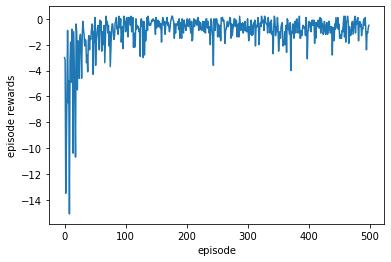

In [19]:
showPlot(range(max_episode), episode_rewards, xlabel='episode', ylabel= 'episode rewards')

In [20]:
qTable

,000,001,002,003,010,011,012,013,020,021,...,312,313,320,321,322,323,330,331,332,333
right,-0.596953,-0.512357,-0.484346,-0.434159,-0.479331,-0.475444,-0.397060,-0.367796,-0.401160,-0.413505,...,0.117689,0.607831,-0.246340,-0.186236,-0.066646,0.897695,-0.226219,-0.054377,-0.050000,0
left,-0.612264,-0.565080,-0.495481,-0.444690,-0.547653,-0.454067,-0.428625,-0.364770,-0.502034,-0.398443,...,-0.170790,-0.050000,-0.277489,-0.236515,-0.064397,0.000000,-0.197056,-0.097500,-0.050000,0
forward,-0.537184,-0.549376,-0.447474,-0.463266,-0.540227,-0.458924,-0.375725,-0.213919,-0.513383,-0.394607,...,-0.180095,-0.050000,-0.267141,-0.204251,-0.097500,0.000000,-0.226219,-0.097500,-0.050000,0
backward,-0.597274,-0.554830,-0.494135,-0.424316,-0.547517,-0.464602,-0.372633,-0.374225,-0.496428,-0.403051,...,-0.194046,-0.050000,-0.266784,-0.173159,-0.110000,0.000000,-0.189768,-0.060793,-0.050000,0
up,-0.607900,-0.562657,-0.489106,-0.441545,-0.533076,-0.417691,-0.233201,-0.374340,-0.500307,-0.343597,...,-0.160830,-0.072500,0.118862,0.408702,0.646669,0.000000,0.380077,0.299631,0.632106,0
down,-0.613394,-0.553748,-0.517316,-0.433923,-0.540617,-0.507354,-0.414213,-0.352203,-0.525159,-0.431197,...,-0.194518,-0.050000,-0.264908,-0.194086,-0.050000,0.000000,-0.185494,-0.050000,0.000000,0
